<a href="https://colab.research.google.com/github/elios-cama/CNN_POKEMON/blob/master/Test_CNN_Dracau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
"""data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/elios-cama/CNN_POKEMON/blob/master/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/')
print(data_dir)
print(os.path.abspath(data_dir))
"""

/content/datasets/dataset
/content/datasets/dataset


In [20]:

data_dir = pathlib.Path('/content/datasets/')
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

71


In [22]:
!rm -rf /content/datasets/.ipynb_checkpoints

In [23]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 71 files belonging to 2 classes.
Using 57 files for training.
Found 71 files belonging to 2 classes.
Using 14 files for validation.
['carapuce', 'dracaufeu']


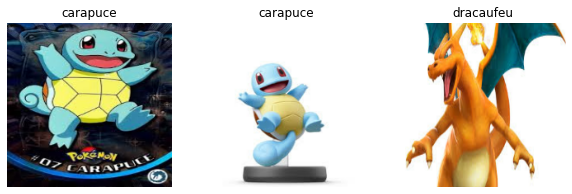

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=100,
  callbacks=[tensorboard_callback]
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 2s 68ms/step - loss: 0.7294 - accuracy: 0.5614 - val_loss: 0.7216 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 1s 54ms/step - loss: 0.6899 - accuracy: 0.5263 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 3/100
19/19 [==============================] - 1s 50ms/step - loss: 0.6901 - accuracy: 0.5614 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 4/100
19/19 [==============================] - 1s 52ms/step - loss: 0.6899 - accuracy: 0.5614 - val_loss: 0.6747 - val_accuracy: 0.8571
Epoch 5/100
19/19 [==============================] - 1s 52ms/step - loss: 0.6973 - accuracy: 0.5088 - val_loss: 0.6846 - val_accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 1s 52ms/step - loss: 0.6754 - accuracy: 0.7018 - val_loss: 0.6316 - val_accuracy: 0.7857
Epoch 7/100
19/19 [==============================] - 1s 52ms/step - loss: 0.5918 - accuracy: 0.6316 - val_loss: 0.4946 - val_accuracy: 0.7857
Epoch 8/100
19/19 

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)       

Saving draco.png to draco.png


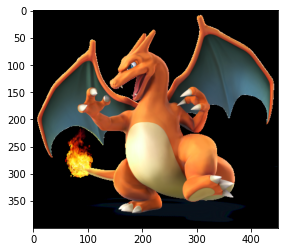

[[9.999037e-01 9.632491e-05]]
[[9.999037e-01 9.632491e-05]]
C'est un carapuce !


In [39]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = model.predict(img_to_predict)
    print(model.predict(img_to_predict))
    print(model.predict(img_to_predict))
    if res[0][0] >0.8:
        
        print("C'est un carapuce !")
    else:
        
        print("C'est un dracaufeu !")
        
        

0.9997552